<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Importing necessary libraries

# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [11]:
pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [19]:
ds = pd.read_csv("C:\\Users\\hp\\Documents\\Great Learning_Introduction to Neural Network\\bank-1.csv")    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [20]:
# let's view the first 5 rows of the data
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# let's view the last 5 rows of the data
ds.tail(5) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [22]:
# Checking the number of rows and columns in the training data
ds.shape 

(10000, 14)

### Check the data types of the columns for the dataset

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [24]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [25]:
# let's check for missing values in the train data
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for unique values for each of the column

In [26]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [27]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### Univariate Analysis

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

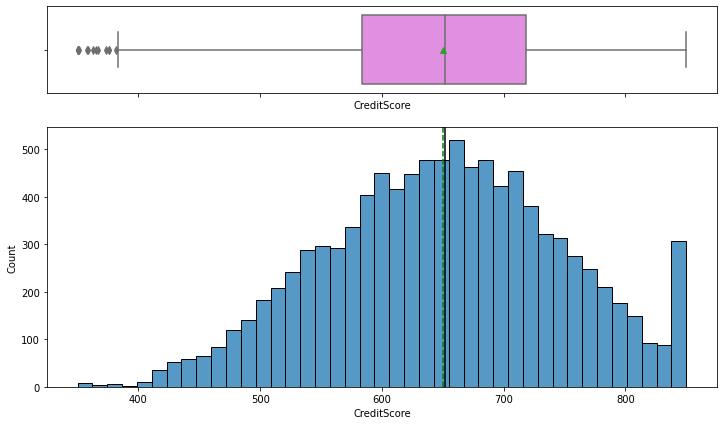

In [32]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

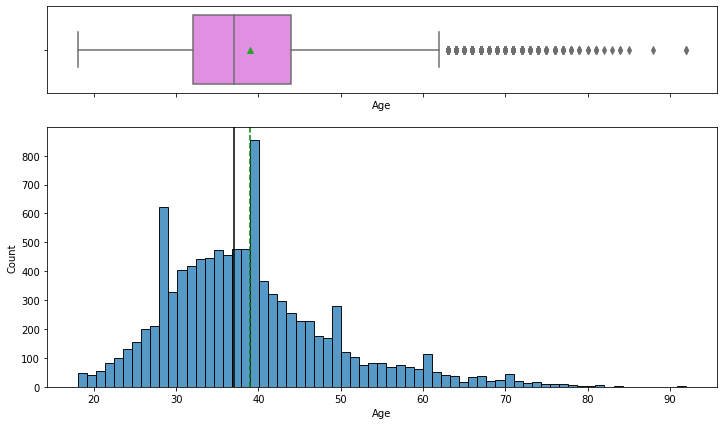

In [34]:
histogram_boxplot(ds,'Age')         

#### Observations on Balance

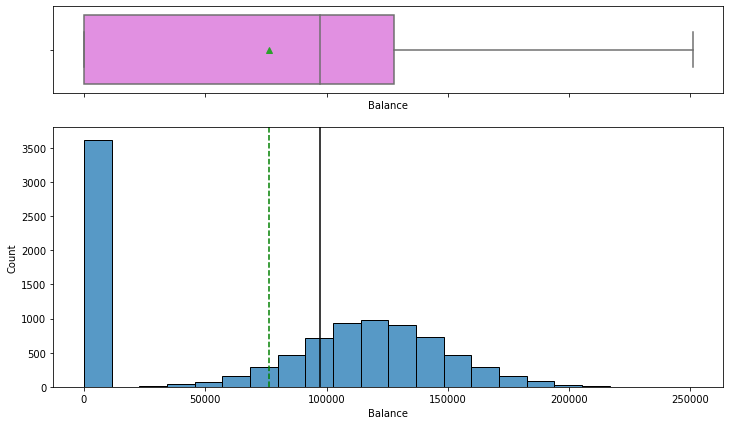

In [36]:
histogram_boxplot(ds,'Balance')       

#### Observations on Estimated Salary

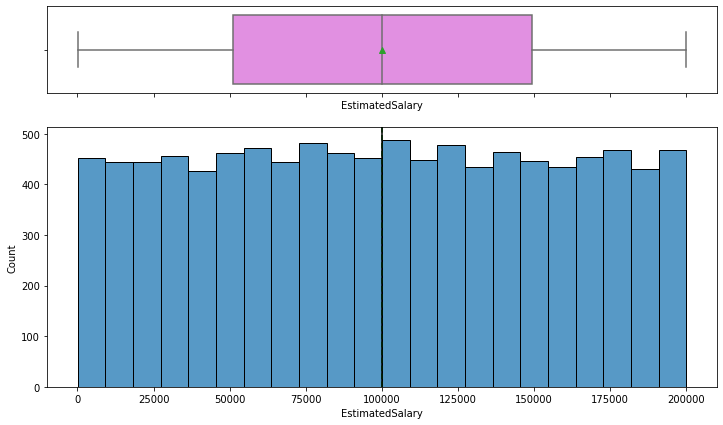

In [37]:
histogram_boxplot(ds,'EstimatedSalary')          

#### Observations on Exited

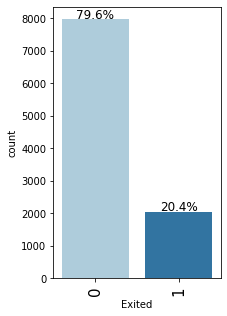

In [38]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

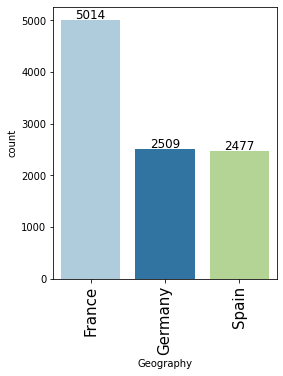

In [39]:
labeled_barplot(ds,'Geography')              

#### Observations on Gender

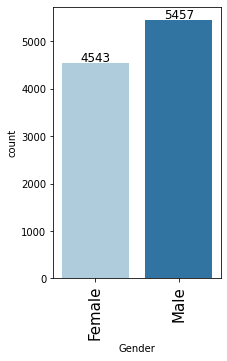

In [40]:
labeled_barplot(ds,'Gender')               

#### Observations on Tenure

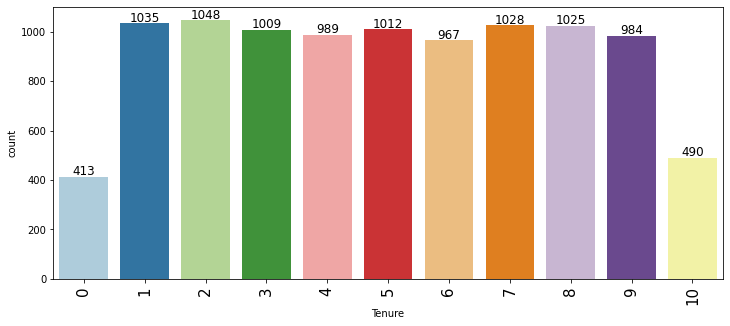

In [41]:
labeled_barplot(ds,'Tenure')               

#### Observations on Number of Products

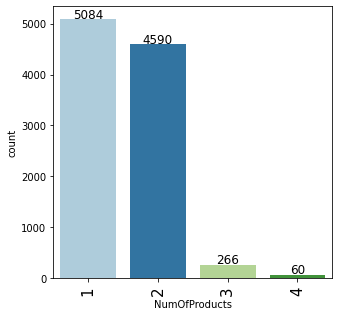

In [42]:
labeled_barplot(ds,'NumOfProducts')               

#### Observations on Has Credit Card

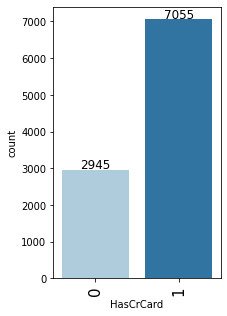

In [43]:
labeled_barplot(ds,'HasCrCard')               

#### Observations on Is Active Member

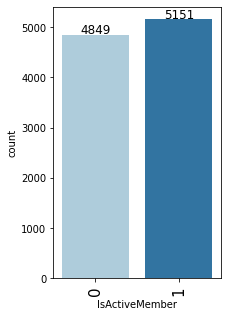

In [44]:
labeled_barplot(ds,'IsActiveMember')               

### Bivariate Analysis

In [45]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [46]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

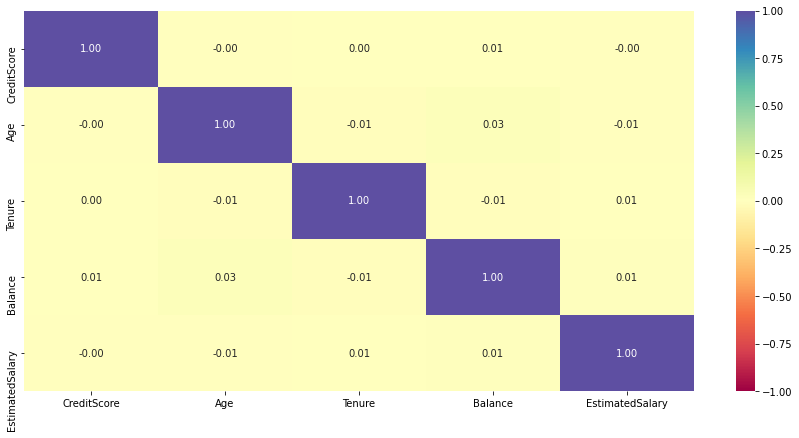

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


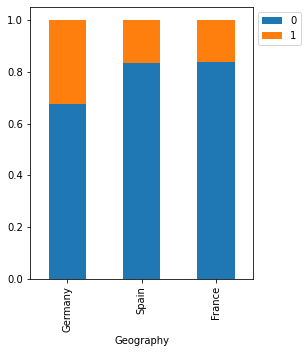

In [48]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


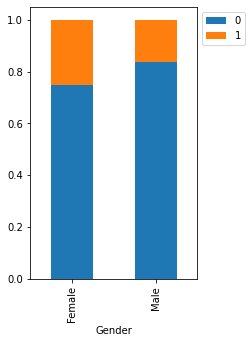

In [49]:
stacked_barplot(ds, "Gender", "Exited" )                   

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


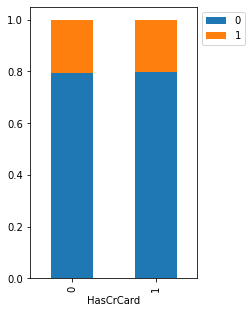

In [50]:
stacked_barplot(ds, "HasCrCard", "Exited" )                  

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


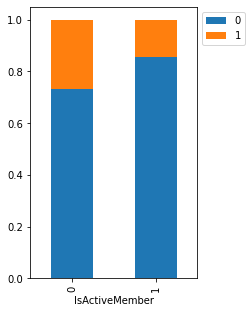

In [51]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   

#### Exited Vs Credit Score

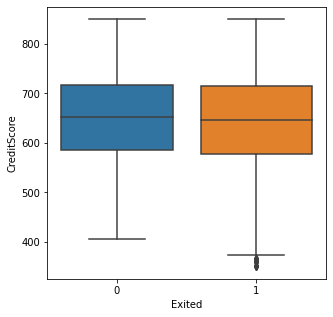

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

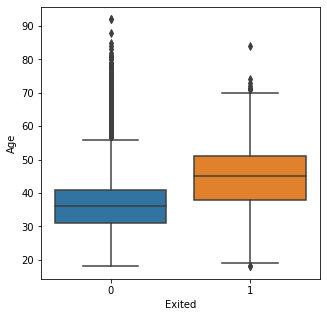

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               
plt.show()

#### Exited Vs Tenure

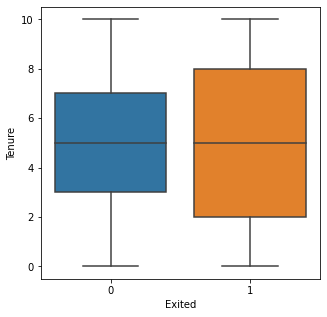

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               
plt.show()

#### Exited Vs Balance

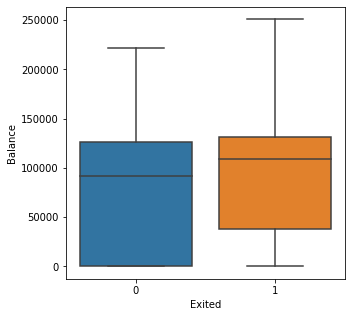

In [55]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)              
plt.show()

#### Exited Vs Number of Products

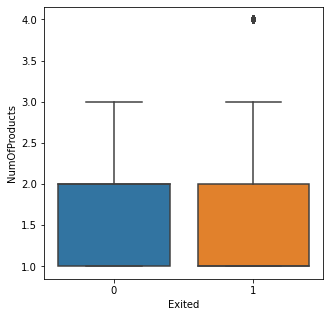

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               
plt.show()

#### Exited Vs Estimated Salary

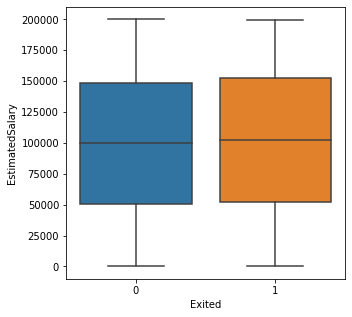

In [57]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [58]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 937.6 KB


In [62]:
ds.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [63]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [64]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [65]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.3, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [66]:
print(X_train.shape, X_val.shape, X_test.shape)

(4900, 11) (2100, 11) (3000, 11)


In [67]:
print(y_train.shape, y_val.shape, y_test.shape)

(4900,) (2100,) (3000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [68]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- The best metric is recall which is a metric used to evaluate a model's ability to correctly identify all relevant instances in a dataset.
- It is defined as the ratio of True positive and True positive + False Negative
- Recall should be prioritized when:
* Missing a true positive has a high cost.
* The dataset is imbalanced and you care about detecting rare events.
* The focus is on maximizing coverage of positive instances, even at the expense of some false positives.

**Let's create a function for plotting the confusion matrix**



In [69]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [70]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [72]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Add a hidden layer 
model_0.add(Dense(32, activation='relu'))
# Add the output layer with the number of neurons required
model_0.add(Dense(1, activation = 'sigmoid'))

In [73]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [74]:
## Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [75]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=850,    ## specify the number of epochs
    verbose=1
)

Epoch 1/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3801 - recall: 0.3357 - val_loss: 0.3812 - val_recall: 0.3505
Epoch 2/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3800 - recall: 0.3377 - val_loss: 0.3812 - val_recall: 0.3505
Epoch 3/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3798 - recall: 0.3337 - val_loss: 0.3811 - val_recall: 0.3505
Epoch 4/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3798 - recall: 0.3357 - val_loss: 0.3810 - val_recall: 0.3528
Epoch 5/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3797 - recall: 0.3357 - val_loss: 0.3809 - val_recall: 0.3528
Epoch 6/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3796 - recall: 0.3347 - val_loss: 0.3808 - val_recall: 0.3528
Epoch 7/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3795 - recall: 0.3337 - val_loss: 0.3808 - val_recall: 0.3528
Epoch 8/850
154/154 [======

154/154 [==============================] - 0s 2ms/step - loss: 0.3692 - recall: 0.3707 - val_loss: 0.3722 - val_recall: 0.3902
Epoch 118/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3691 - recall: 0.3617 - val_loss: 0.3722 - val_recall: 0.3902
Epoch 119/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3690 - recall: 0.3667 - val_loss: 0.3722 - val_recall: 0.3925
Epoch 120/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3689 - recall: 0.3637 - val_loss: 0.3722 - val_recall: 0.3925
Epoch 121/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3688 - recall: 0.3657 - val_loss: 0.3720 - val_recall: 0.3925
Epoch 122/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3687 - recall: 0.3657 - val_loss: 0.3719 - val_recall: 0.3902
Epoch 123/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3686 - recall: 0.3627 - val_loss: 0.3718 - val_recall: 0.3925
Epoch 124/850
154/154 [====

154/154 [==============================] - 0s 2ms/step - loss: 0.3590 - recall: 0.4068 - val_loss: 0.3637 - val_recall: 0.4276
Epoch 234/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3588 - recall: 0.3988 - val_loss: 0.3638 - val_recall: 0.4322
Epoch 235/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3588 - recall: 0.3998 - val_loss: 0.3637 - val_recall: 0.4299
Epoch 236/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3587 - recall: 0.4008 - val_loss: 0.3639 - val_recall: 0.4346
Epoch 237/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3586 - recall: 0.4058 - val_loss: 0.3636 - val_recall: 0.4322
Epoch 238/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3585 - recall: 0.4048 - val_loss: 0.3634 - val_recall: 0.4276
Epoch 239/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3584 - recall: 0.4028 - val_loss: 0.3633 - val_recall: 0.4276
Epoch 240/850
154/154 [====

154/154 [==============================] - 0s 2ms/step - loss: 0.3496 - recall: 0.4148 - val_loss: 0.3567 - val_recall: 0.4486
Epoch 350/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3494 - recall: 0.4218 - val_loss: 0.3562 - val_recall: 0.4439
Epoch 351/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3494 - recall: 0.4138 - val_loss: 0.3565 - val_recall: 0.4463
Epoch 352/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3494 - recall: 0.4178 - val_loss: 0.3567 - val_recall: 0.4509
Epoch 353/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3493 - recall: 0.4168 - val_loss: 0.3568 - val_recall: 0.4533
Epoch 354/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3492 - recall: 0.4238 - val_loss: 0.3567 - val_recall: 0.4533
Epoch 355/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3491 - recall: 0.4228 - val_loss: 0.3562 - val_recall: 0.4486
Epoch 356/850
154/154 [====

154/154 [==============================] - 0s 3ms/step - loss: 0.3410 - recall: 0.4349 - val_loss: 0.3513 - val_recall: 0.4626
Epoch 466/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3408 - recall: 0.4449 - val_loss: 0.3509 - val_recall: 0.4556
Epoch 467/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3409 - recall: 0.4309 - val_loss: 0.3513 - val_recall: 0.4696
Epoch 468/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3408 - recall: 0.4409 - val_loss: 0.3515 - val_recall: 0.4743
Epoch 469/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3407 - recall: 0.4439 - val_loss: 0.3510 - val_recall: 0.4650
Epoch 470/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3407 - recall: 0.4379 - val_loss: 0.3507 - val_recall: 0.4603
Epoch 471/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3405 - recall: 0.4299 - val_loss: 0.3513 - val_recall: 0.4720
Epoch 472/850
154/154 [====

154/154 [==============================] - 0s 2ms/step - loss: 0.3336 - recall: 0.4619 - val_loss: 0.3472 - val_recall: 0.4766
Epoch 582/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3335 - recall: 0.4519 - val_loss: 0.3476 - val_recall: 0.4836
Epoch 583/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3335 - recall: 0.4569 - val_loss: 0.3472 - val_recall: 0.4790
Epoch 584/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3334 - recall: 0.4619 - val_loss: 0.3472 - val_recall: 0.4743
Epoch 585/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3333 - recall: 0.4549 - val_loss: 0.3473 - val_recall: 0.4790
Epoch 586/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3333 - recall: 0.4559 - val_loss: 0.3476 - val_recall: 0.4860
Epoch 587/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3332 - recall: 0.4649 - val_loss: 0.3471 - val_recall: 0.4766
Epoch 588/850
154/154 [====

154/154 [==============================] - 0s 3ms/step - loss: 0.3271 - recall: 0.4739 - val_loss: 0.3448 - val_recall: 0.4860
Epoch 698/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3270 - recall: 0.4760 - val_loss: 0.3449 - val_recall: 0.4907
Epoch 699/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3270 - recall: 0.4749 - val_loss: 0.3445 - val_recall: 0.4790
Epoch 700/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3269 - recall: 0.4669 - val_loss: 0.3449 - val_recall: 0.4907
Epoch 701/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3268 - recall: 0.4679 - val_loss: 0.3455 - val_recall: 0.5000
Epoch 702/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3269 - recall: 0.4800 - val_loss: 0.3447 - val_recall: 0.4860
Epoch 703/850
154/154 [==============================] - 0s 3ms/step - loss: 0.3268 - recall: 0.4719 - val_loss: 0.3455 - val_recall: 0.5047
Epoch 704/850
154/154 [====

154/154 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4830 - val_loss: 0.3434 - val_recall: 0.4930
Epoch 814/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4749 - val_loss: 0.3441 - val_recall: 0.5070
Epoch 815/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3214 - recall: 0.4790 - val_loss: 0.3434 - val_recall: 0.4953
Epoch 816/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3213 - recall: 0.4770 - val_loss: 0.3434 - val_recall: 0.4953
Epoch 817/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3213 - recall: 0.4749 - val_loss: 0.3435 - val_recall: 0.4977
Epoch 818/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3213 - recall: 0.4749 - val_loss: 0.3439 - val_recall: 0.5047
Epoch 819/850
154/154 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4780 - val_loss: 0.3442 - val_recall: 0.5093
Epoch 820/850
154/154 [====

**Loss function**

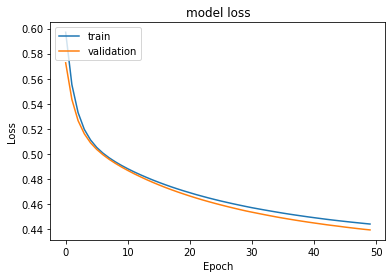

In [77]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

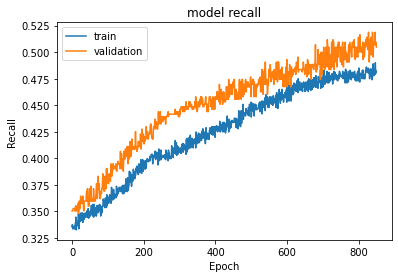

In [95]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [96]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

154/154 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [97]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [98]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [99]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3902
           1       0.78      0.48      0.59       998

    accuracy                           0.87      4900
   macro avg       0.83      0.72      0.76      4900
weighted avg       0.86      0.87      0.85      4900



In [100]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1672
           1       0.70      0.50      0.59       428

    accuracy                           0.86      2100
   macro avg       0.79      0.72      0.75      2100
weighted avg       0.84      0.86      0.85      2100



**Confusion matrix**

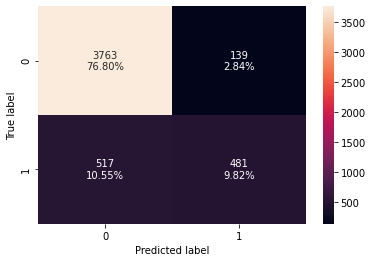

In [101]:
make_confusion_matrix(y_train, y_train_pred)

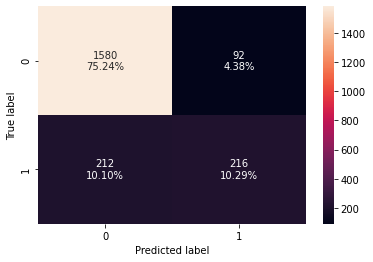

In [102]:
make_confusion_matrix(y_val, y_val_pred)    ## check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [103]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [104]:
#Initializing the neural network
model_1 = Sequential()
#Add a input layer 
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Add a hidden layer 
model_1.add(Dense(32,activation='relu'))
#Add a output layer with the required number of neurons and an activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [105]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [106]:
# Compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [107]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [108]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32, ## specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=150, ## specify the number of epochs
    verbose=1
)

Epoch 1/150
154/154 [==============================] - 1s 3ms/step - loss: 0.4677 - recall: 0.0411 - val_loss: 0.4300 - val_recall: 0.1729
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 0.4298 - recall: 0.1784 - val_loss: 0.4193 - val_recall: 0.2150
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 0.4200 - recall: 0.2094 - val_loss: 0.4105 - val_recall: 0.2734
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.4141 - recall: 0.2395 - val_loss: 0.4033 - val_recall: 0.2547
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4050 - recall: 0.2766 - val_loss: 0.3985 - val_recall: 0.3645
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.3964 - recall: 0.3076 - val_loss: 0.3923 - val_recall: 0.3481
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.3893 - recall: 0.3407 - val_loss: 0.3847 - val_recall: 0.3294
Epoch 8/150
154/154 [======

154/154 [==============================] - 0s 2ms/step - loss: 0.2315 - recall: 0.6733 - val_loss: 0.4217 - val_recall: 0.5514
Epoch 118/150
154/154 [==============================] - 0s 2ms/step - loss: 0.2293 - recall: 0.6543 - val_loss: 0.4382 - val_recall: 0.6332
Epoch 119/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2267 - recall: 0.6733 - val_loss: 0.4254 - val_recall: 0.5023
Epoch 120/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2260 - recall: 0.6703 - val_loss: 0.4280 - val_recall: 0.5748
Epoch 121/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2265 - recall: 0.6663 - val_loss: 0.4379 - val_recall: 0.5841
Epoch 122/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2276 - recall: 0.6593 - val_loss: 0.4284 - val_recall: 0.5748
Epoch 123/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2231 - recall: 0.6764 - val_loss: 0.4233 - val_recall: 0.4977
Epoch 124/150
154/154 [====

**Loss function**

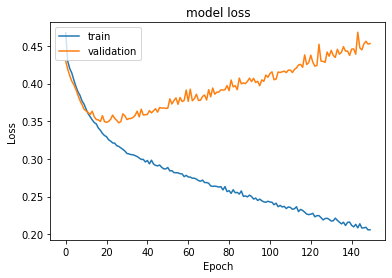

In [109]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

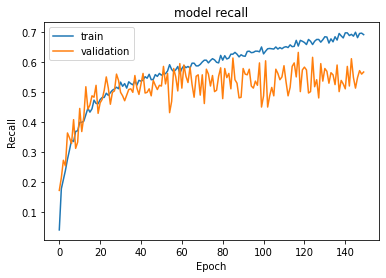

In [110]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [111]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

154/154 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [112]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [113]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [114]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3902
           1       0.87      0.74      0.80       998

    accuracy                           0.92      4900
   macro avg       0.90      0.86      0.88      4900
weighted avg       0.92      0.92      0.92      4900



In [115]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1672
           1       0.59      0.57      0.58       428

    accuracy                           0.83      2100
   macro avg       0.74      0.73      0.74      2100
weighted avg       0.83      0.83      0.83      2100



**Confusion matrix**

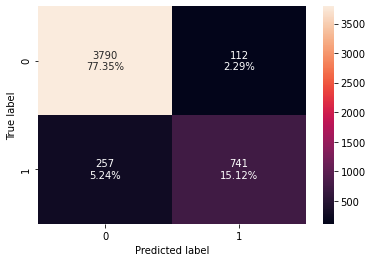

In [116]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

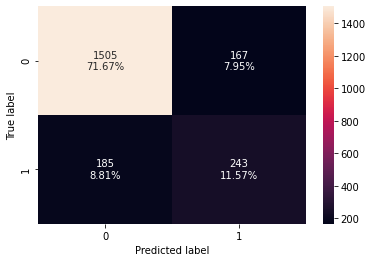

In [117]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [216]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [217]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Add dropout with ratio of 0.2 or any suitable value
model_2.add(Dropout(0.2))
# Add a hidden layer 
model_2.add(Dense(64,activation='relu'))
# Add a hidden layer 
model_2.add(Dense(64,activation='relu'))
# Add dropout with ratio of 0.1 or any suitable value
model_2.add(Dropout(0.1))
# Add a hidden layer 
model_2.add(Dense(32,activation='relu'))
# Add the number of neurons required in the output layer
model_2.add(Dense(1, activation = 'sigmoid'))

In [218]:
#Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [219]:
## Compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [220]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [221]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##specify the batch size.
    epochs=150, ##specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4971 - recall: 0.0431 - val_loss: 0.4383 - val_recall: 0.0561
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4456 - recall: 0.1323 - val_loss: 0.4234 - val_recall: 0.1706
Epoch 3/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4385 - recall: 0.1974 - val_loss: 0.4169 - val_recall: 0.2500
Epoch 4/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4317 - recall: 0.1994 - val_loss: 0.4079 - val_recall: 0.2547
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4263 - recall: 0.2335 - val_loss: 0.4060 - val_recall: 0.4112
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4213 - recall: 0.2625 - val_loss: 0.3991 - val_recall: 0.3061
Epoch 7/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4137 - recall: 0.2705 - val_loss: 0.3913 - val_recall: 0.3294
Epoch 8/150
154/154 [======

154/154 [==============================] - 0s 3ms/step - loss: 0.2917 - recall: 0.5471 - val_loss: 0.3847 - val_recall: 0.4930
Epoch 118/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2893 - recall: 0.5581 - val_loss: 0.3918 - val_recall: 0.5350
Epoch 119/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2865 - recall: 0.5892 - val_loss: 0.3866 - val_recall: 0.4977
Epoch 120/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2782 - recall: 0.5772 - val_loss: 0.3937 - val_recall: 0.5327
Epoch 121/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2828 - recall: 0.5772 - val_loss: 0.3939 - val_recall: 0.5023
Epoch 122/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2837 - recall: 0.5611 - val_loss: 0.3854 - val_recall: 0.5000
Epoch 123/150
154/154 [==============================] - 0s 3ms/step - loss: 0.2785 - recall: 0.5952 - val_loss: 0.4000 - val_recall: 0.5187
Epoch 124/150
154/154 [====

**Loss function**

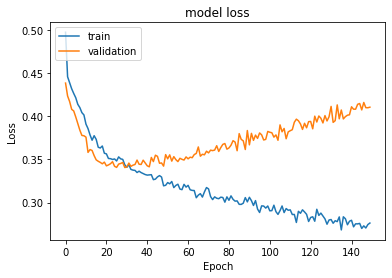

In [222]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

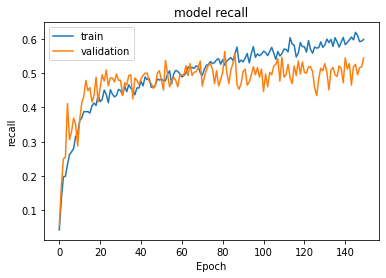

In [223]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [224]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

154/154 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [225]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [226]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [227]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3902
           1       0.86      0.73      0.79       998

    accuracy                           0.92      4900
   macro avg       0.90      0.85      0.87      4900
weighted avg       0.92      0.92      0.92      4900



In [228]:
#classification report
cr = classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1672
           1       0.59      0.54      0.57       428

    accuracy                           0.83      2100
   macro avg       0.74      0.72      0.73      2100
weighted avg       0.82      0.83      0.83      2100



**Confusion matrix**

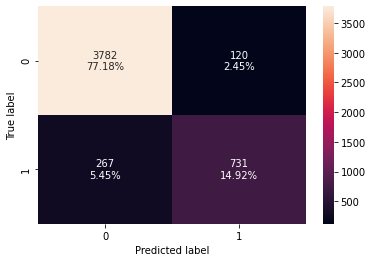

In [229]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

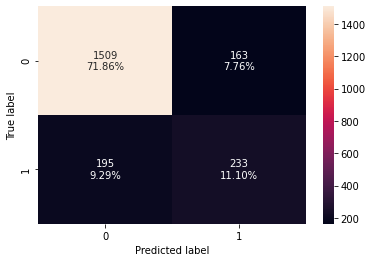

In [230]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [134]:
sm  = SMOTE(random_state=42)
#Fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (7804, 11)
After UpSampling, the shape of train_y: (7804,) 



Let's build a model with the balanced dataset

In [135]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [136]:
#Initializing the model
model_3 = Sequential()
#Add a input layer
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Add a hidden layer
model_3.add(Dense(16,activation='relu'))
#Add a hidden layer 
model_3.add(Dense(16,activation='relu'))
#Add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [137]:
#Use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [141]:
#Compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [142]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [143]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## specify the batch size to use
    epochs=150, ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/150
244/244 [==============================] - 1s 3ms/step - loss: 0.7018 - recall: 0.9792 - val_loss: 0.7725 - val_recall: 0.9743
Epoch 2/150
244/244 [==============================] - 0s 2ms/step - loss: 0.6919 - recall: 0.9221 - val_loss: 0.7440 - val_recall: 0.9299
Epoch 3/150
244/244 [==============================] - 0s 2ms/step - loss: 0.6855 - recall: 0.8567 - val_loss: 0.7244 - val_recall: 0.8598
Epoch 4/150
244/244 [==============================] - 0s 2ms/step - loss: 0.6809 - recall: 0.7878 - val_loss: 0.7102 - val_recall: 0.8154
Epoch 5/150
244/244 [==============================] - 0s 2ms/step - loss: 0.6771 - recall: 0.7496 - val_loss: 0.6991 - val_recall: 0.7453
Epoch 6/150
244/244 [==============================] - 1s 2ms/step - loss: 0.6738 - recall: 0.7025 - val_loss: 0.6910 - val_recall: 0.6963
Epoch 7/150
244/244 [==============================] - 1s 2ms/step - loss: 0.6708 - recall: 0.6771 - val_loss: 0.6847 - val_recall: 0.6776
Epoch 8/150
244/244 [======

244/244 [==============================] - 1s 2ms/step - loss: 0.5213 - recall: 0.7230 - val_loss: 0.5421 - val_recall: 0.6986
Epoch 118/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5209 - recall: 0.7281 - val_loss: 0.5376 - val_recall: 0.6893
Epoch 119/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5205 - recall: 0.7214 - val_loss: 0.5413 - val_recall: 0.7009
Epoch 120/150
244/244 [==============================] - 1s 3ms/step - loss: 0.5200 - recall: 0.7250 - val_loss: 0.5433 - val_recall: 0.7056
Epoch 121/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5196 - recall: 0.7307 - val_loss: 0.5388 - val_recall: 0.6963
Epoch 122/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5192 - recall: 0.7245 - val_loss: 0.5429 - val_recall: 0.7056
Epoch 123/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5187 - recall: 0.7296 - val_loss: 0.5408 - val_recall: 0.7033
Epoch 124/150
244/244 [====

**Loss function**

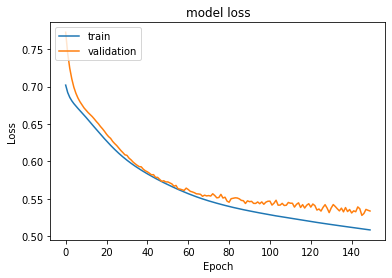

In [144]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

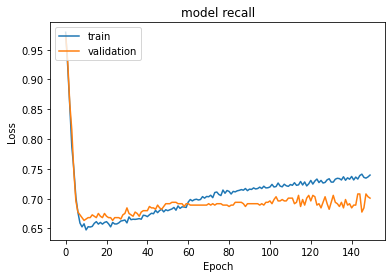

In [145]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

244/244 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [147]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [148]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [149]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3902
           1       0.75      0.74      0.75      3902

    accuracy                           0.75      7804
   macro avg       0.75      0.75      0.75      7804
weighted avg       0.75      0.75      0.75      7804



In [150]:
cr=classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1672
           1       0.42      0.70      0.52       428

    accuracy                           0.74      2100
   macro avg       0.66      0.73      0.67      2100
weighted avg       0.81      0.74      0.76      2100



**Confusion matrix**

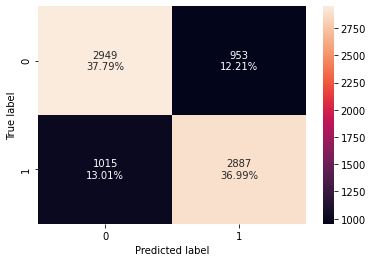

In [151]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

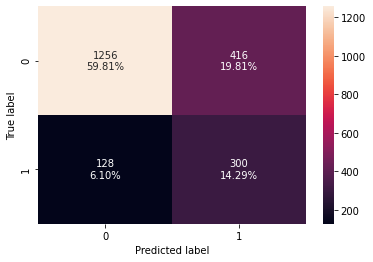

In [152]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [153]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [160]:
#Initializing the model
model_4 = Sequential()
#Add a input layer 
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Add a hidden layer 
model_4.add(Dense(16,activation='relu'))
#Add a hidden layer 
model_4.add(Dense(16,activation='relu'))
#Add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [161]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [162]:
#Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [163]:
# Compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [164]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [165]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## specify the batch size to use
    epochs=150,  ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/150
244/244 [==============================] - 1s 3ms/step - loss: 0.5988 - recall_1: 0.7060 - val_loss: 0.5376 - val_recall_1: 0.6706
Epoch 2/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5395 - recall_1: 0.7176 - val_loss: 0.5537 - val_recall_1: 0.7126
Epoch 3/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5210 - recall_1: 0.7242 - val_loss: 0.5743 - val_recall_1: 0.7430
Epoch 4/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5065 - recall_1: 0.7355 - val_loss: 0.5651 - val_recall_1: 0.7360
Epoch 5/150
244/244 [==============================] - 1s 2ms/step - loss: 0.4941 - recall_1: 0.7419 - val_loss: 0.5117 - val_recall_1: 0.7079
Epoch 6/150
244/244 [==============================] - 1s 2ms/step - loss: 0.4788 - recall_1: 0.7471 - val_loss: 0.4873 - val_recall_1: 0.7150
Epoch 7/150
244/244 [==============================] - 1s 2ms/step - loss: 0.4647 - recall_1: 0.7673 - val_loss: 0.4831 - val_recall_1: 0.7336

Epoch 58/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3291 - recall_1: 0.8616 - val_loss: 0.4873 - val_recall_1: 0.7430
Epoch 59/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3308 - recall_1: 0.8601 - val_loss: 0.4900 - val_recall_1: 0.7547
Epoch 60/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3258 - recall_1: 0.8631 - val_loss: 0.4701 - val_recall_1: 0.7313
Epoch 61/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3262 - recall_1: 0.8649 - val_loss: 0.4888 - val_recall_1: 0.7383
Epoch 62/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3269 - recall_1: 0.8621 - val_loss: 0.5184 - val_recall_1: 0.7477
Epoch 63/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3258 - recall_1: 0.8590 - val_loss: 0.5683 - val_recall_1: 0.7921
Epoch 64/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3262 - recall_1: 0.8657 - val_loss: 0.4831 - val_recall_1:

Epoch 115/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2831 - recall_1: 0.8890 - val_loss: 0.5682 - val_recall_1: 0.7290
Epoch 116/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2836 - recall_1: 0.8872 - val_loss: 0.5447 - val_recall_1: 0.7009
Epoch 117/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2846 - recall_1: 0.8921 - val_loss: 0.5165 - val_recall_1: 0.6519
Epoch 118/150
244/244 [==============================] - 1s 3ms/step - loss: 0.2831 - recall_1: 0.8921 - val_loss: 0.5599 - val_recall_1: 0.7126
Epoch 119/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2811 - recall_1: 0.8911 - val_loss: 0.6384 - val_recall_1: 0.7523
Epoch 120/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2792 - recall_1: 0.8947 - val_loss: 0.5299 - val_recall_1: 0.6799
Epoch 121/150
244/244 [==============================] - 1s 2ms/step - loss: 0.2806 - recall_1: 0.8883 - val_loss: 0.5077 - val_re

**Loss function**

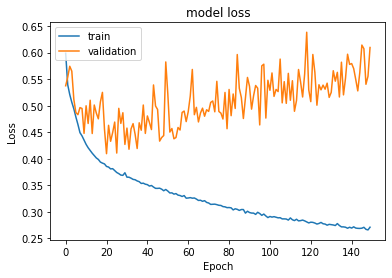

In [169]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

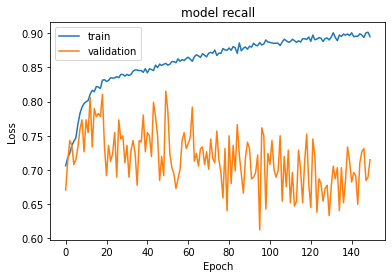

In [172]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall_1'])
plt.plot(history_4.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [173]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

244/244 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [174]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [175]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [176]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      3902
           1       0.87      0.92      0.89      3902

    accuracy                           0.89      7804
   macro avg       0.89      0.89      0.89      7804
weighted avg       0.89      0.89      0.89      7804



In [177]:
cr=classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1672
           1       0.46      0.71      0.56       428

    accuracy                           0.77      2100
   macro avg       0.69      0.75      0.70      2100
weighted avg       0.82      0.77      0.79      2100



**Confusion matrix**

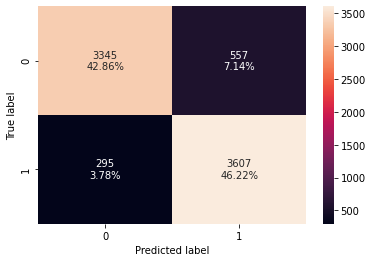

In [178]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

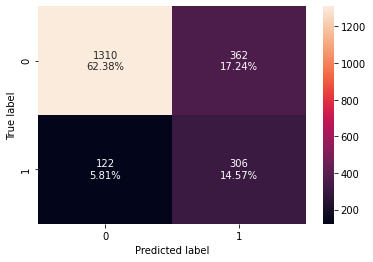

In [179]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [180]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [195]:
#Initializing the model
model_5 = Sequential()
# Add required no. of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Add dropout rate
model_5.add(Dropout(0.2))
# Add required no. of neurons to the hidden layer with an activation function.
model_5.add(Dense(16,activation='relu'))
# Add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [196]:
# Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [197]:
# Compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [198]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

In [199]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## specify the batch size to use
    epochs=150, ## specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/150
244/244 [==============================] - 1s 3ms/step - loss: 0.6301 - recall_1: 0.6028 - val_loss: 0.5348 - val_recall_1: 0.5935
Epoch 2/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5818 - recall_1: 0.6691 - val_loss: 0.5584 - val_recall_1: 0.7056
Epoch 3/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5656 - recall_1: 0.7060 - val_loss: 0.5640 - val_recall_1: 0.7150
Epoch 4/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5520 - recall_1: 0.7130 - val_loss: 0.5666 - val_recall_1: 0.7290
Epoch 5/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5459 - recall_1: 0.7327 - val_loss: 0.5428 - val_recall_1: 0.7126
Epoch 6/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5375 - recall_1: 0.7286 - val_loss: 0.5357 - val_recall_1: 0.6893
Epoch 7/150
244/244 [==============================] - 1s 2ms/step - loss: 0.5309 - recall_1: 0.7201 - val_loss: 0.5437 - val_recall_1: 0.6986

Epoch 58/150
244/244 [==============================] - 1s 2ms/step - loss: 0.4014 - recall_1: 0.8252 - val_loss: 0.4484 - val_recall_1: 0.7407
Epoch 59/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3982 - recall_1: 0.8342 - val_loss: 0.4604 - val_recall_1: 0.7593
Epoch 60/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3961 - recall_1: 0.8391 - val_loss: 0.4484 - val_recall_1: 0.7243
Epoch 61/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3973 - recall_1: 0.8285 - val_loss: 0.4629 - val_recall_1: 0.7430
Epoch 62/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3998 - recall_1: 0.8288 - val_loss: 0.4603 - val_recall_1: 0.7453
Epoch 63/150
244/244 [==============================] - 1s 2ms/step - loss: 0.4004 - recall_1: 0.8262 - val_loss: 0.4544 - val_recall_1: 0.7360
Epoch 64/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3976 - recall_1: 0.8314 - val_loss: 0.4475 - val_recall_1:

Epoch 115/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3849 - recall_1: 0.8396 - val_loss: 0.4876 - val_recall_1: 0.7570
Epoch 116/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3817 - recall_1: 0.8383 - val_loss: 0.4632 - val_recall_1: 0.7336
Epoch 117/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3785 - recall_1: 0.8447 - val_loss: 0.4646 - val_recall_1: 0.7150
Epoch 118/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3797 - recall_1: 0.8380 - val_loss: 0.4527 - val_recall_1: 0.7336
Epoch 119/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3831 - recall_1: 0.8375 - val_loss: 0.4824 - val_recall_1: 0.7570
Epoch 120/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3827 - recall_1: 0.8362 - val_loss: 0.4732 - val_recall_1: 0.7570
Epoch 121/150
244/244 [==============================] - 1s 2ms/step - loss: 0.3803 - recall_1: 0.8401 - val_loss: 0.4628 - val_re

**Loss function**

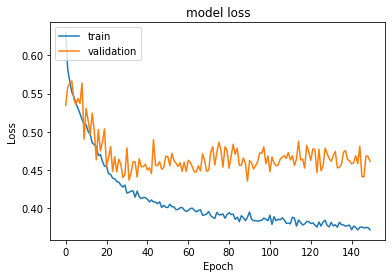

In [200]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

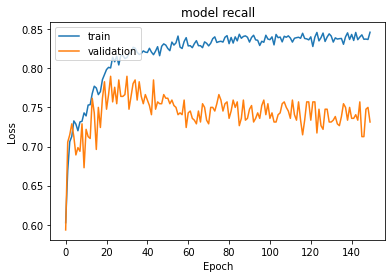

In [202]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall_1'])
plt.plot(history_5.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [203]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

244/244 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [204]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

66/66 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [205]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [206]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3902
           1       0.84      0.88      0.86      3902

    accuracy                           0.86      7804
   macro avg       0.86      0.86      0.86      7804
weighted avg       0.86      0.86      0.86      7804



In [207]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1672
           1       0.48      0.73      0.58       428

    accuracy                           0.78      2100
   macro avg       0.70      0.76      0.72      2100
weighted avg       0.83      0.78      0.80      2100



**Confusion matrix**

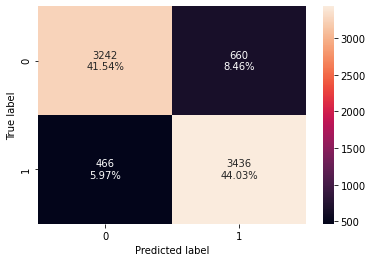

In [208]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

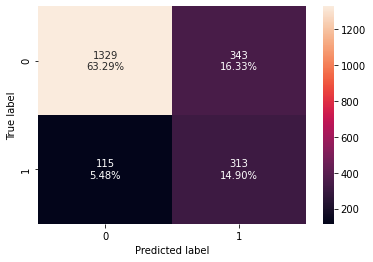

In [209]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [231]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.481964
NN with Adam,0.742485
NN with Adam & Dropout,0.732465
NN with SMOTE & SGD,0.739877
NN with SMOTE & Adam,0.924398
"NN with SMOTE,Adam & Dropout",0.880574


In [232]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.504673
NN with Adam,0.567757
NN with Adam & Dropout,0.544393
NN with SMOTE & SGD,0.700935
NN with SMOTE & Adam,0.714953
"NN with SMOTE,Adam & Dropout",0.731308


In [233]:
train_metric_df - valid_metric_df

,recall
NN with SGD,-0.022709
NN with Adam,0.174728
NN with Adam & Dropout,0.188072
NN with SMOTE & SGD,0.038942
NN with SMOTE & Adam,0.209444
"NN with SMOTE,Adam & Dropout",0.149266


In [234]:
y_test_pred = model_5.predict(X_test)    ## specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

94/94 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [235]:
#print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2389
           1       0.49      0.74      0.59       611

    accuracy                           0.79      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.84      0.79      0.80      3000



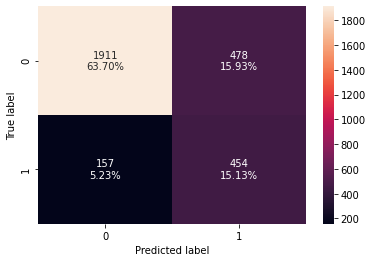

In [236]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

* The model "NN with SMOTE,Adam & Dropout" out of all the models performed well.
* Adam converges faster as compared to SGD, Smote helped model to perform good on both the classes by avoiding the data imbalance and dropout helped in avoiding overfitting by making the model perform better on both the training and validation data.
* The comparison was made based on the recall value on the training and validation dataset.
* For all the models the batch size and no. of epochs are kept constant. Also, the no. of nuerons are preferred to be same in all the models but having slight variations in case of dropout models. 
* This project is done from the point of view of implementation of neural network in real world scenerio. Also, it is performed to understand the model building, training and optimizing techniques.
* Different combinations of no.of neurons in each layer, batch size, epochs can be used to obtain a final conclusion regarding the best model.


<font size=6 color='blue'>Power Ahead</font>
___